In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import zscore



# 1. Data Loading and Exploration

In [40]:
 # load the dataset
df=pd.read_csv('monthly_milk_production.csv')
df

,Date,Production
0,1962-01,589
1,1962-02,561
2,1962-03,640
3,1962-04,656
4,1962-05,727
...,...,...
163,1975-08,858
164,1975-09,817
165,1975-10,827
166,1975-11,797


168 monthly milk production records are present from January 1962 - December 1975. All the production value of milk are in litres.

In [41]:
df.dtypes

Date          object
Production     int64
dtype: object

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Date        168 non-null    object
 1   Production  168 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.8+ KB


In [43]:
df['Date']=pd.to_datetime(df['Date']) # convert date column from objet to datetime datatype.

In [44]:
df.dtypes

Date          datetime64[ns]
Production             int64
dtype: object

In [45]:
df.set_index('Date',inplace=True) # set date column  as index column

In [46]:
df

,Production
Date,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727
...,...
1975-08-01,858
1975-09-01,817
1975-10-01,827


In [47]:
df.head()

,Production
Date,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727


In [48]:
df.tail()

,Production
Date,
1975-08-01,858
1975-09-01,817
1975-10-01,827
1975-11-01,797
1975-12-01,843


In [49]:
df.describe()

,Production
count,168.000000
mean,754.708333
std,102.204524
min,553.000000
25%,677.750000
50%,761.000000
75%,824.500000
max,969.000000


# 2. Data Cleaning and Transformation

In [50]:
df.isnull().sum() # check if there is any missing value

Production    0
dtype: int64

In [51]:
# There is no any missing value in the dataset
# if there was missing value we use fillna to fill the missing value
df=df.fillna(method='ffill')

C:\Users\dell\AppData\Local\Temp\ipykernel_16292\1559148899.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df=df.fillna(method='ffill')


In [52]:
df.shape

(168, 1)

In [53]:
# Detect outlier using z _score

df['zscore']=zscore(df["Production"])

In [54]:
df.head()

,Production,zscore
Date,,
1962-01-01,589,-1.626188
1962-02-01,561,-1.900967
1962-03-01,640,-1.125696
1962-04-01,656,-0.968679
1962-05-01,727,-0.271917


In [55]:
# Removing outliers
df=df[df['zscore'].abs()<3]

In [56]:
df.shape
# The size of dataframe remains unchanged even after outlier removal operation so we can conclude there is no any outlier in the datasset.

(168, 2)

In [57]:
df.drop('zscore',axis=1,inplace=True) # drop the zscore column

In [58]:
df.head()

,Production
Date,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727


# 3. Exploratory Data Analysis (EDA) 

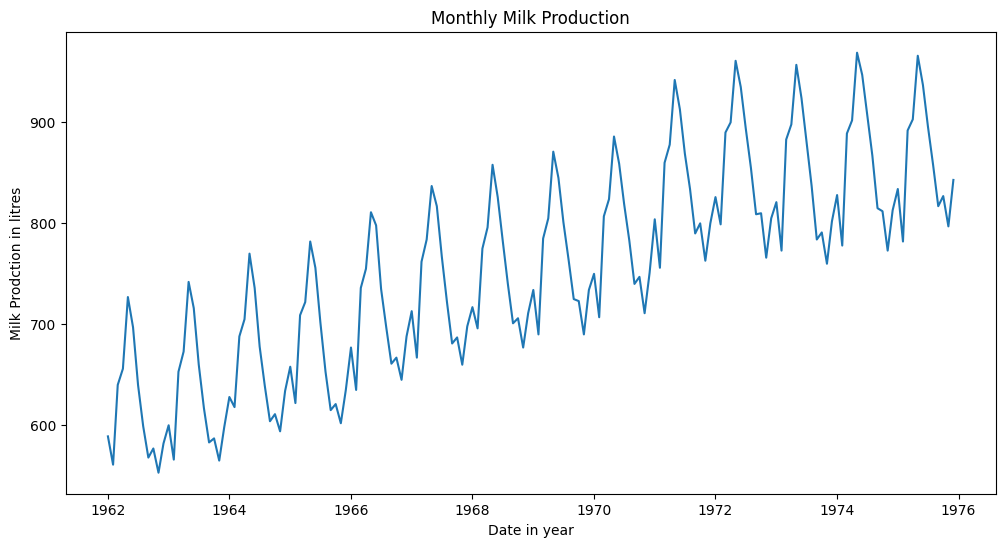

In [59]:
# Plot the cleaned dataset

plt.figure(figsize=(12,6))
plt.plot(df.index,df['Production'])
plt.title("Monthly Milk Production")
plt.xlabel("Date in year")
plt.ylabel("Milk Prodction in litres")
plt.show()

We can observe that there is an increasing trend and very strong seasonality in our data.

<Axes: xlabel='Production', ylabel='Count'>

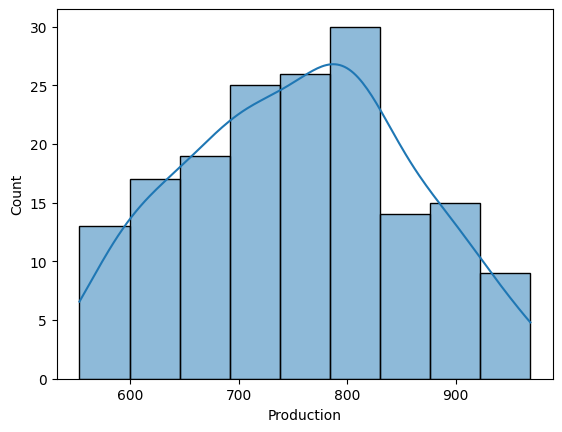

In [60]:
sns.histplot(df['Production'],kde=True)



Milk production is right skewed which means Mean > Median > Mode.

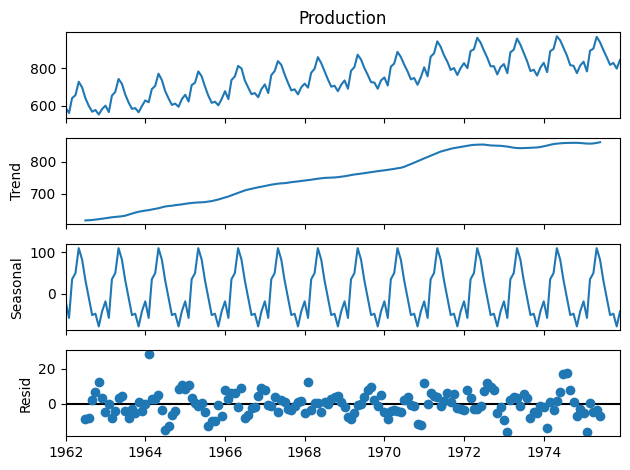

In [61]:
# Seasonal decomposition

from statsmodels.tsa.seasonal import seasonal_decompose

# Additive decomposition(for seasonal data)
decomposition=seasonal_decompose(df['Production'],period=12,model='additive')

# Plot decomposition
decomposition.plot()
plt.show()



**The decomposition of time series is a statistical method to deconstruct time series into its trend, seasonal and residual components:**

- Trend: This is the general, long term tendency of the data to increase or decrease with time.
- Seasonality: It is the non-random component that repeats itself at regular intervals.
- Residual: It is the random, unpredictable variation in the series that is not accounted for by the trend or seasonality.
Residual = Observed Data – Trend - Seasonality.


**Model Parameter of Seasonal Decomposition:**

- In an additive model, the trend, seasonality and residuals components are added together to form the time series. It is used when the magnitude of the seasonal fluctuations is constant over time and is independent of the level of the time series.
- In a multiplicative model, the trend, seasonality and residuals components are multiplied together to form the time series. It is used when the seasonal fluctuations increase or decrease in proportion to the level of time series.  



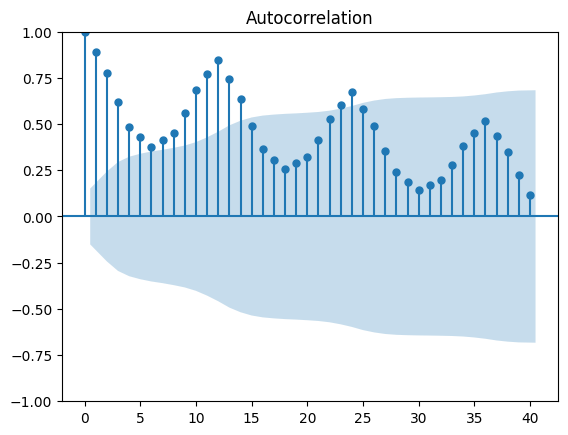

In [62]:
# Autocorrelation
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(df['Production'], lags=40)
plt.show()


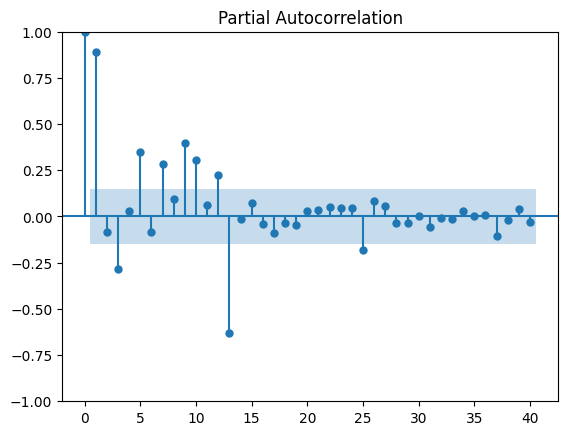

In [63]:
# Partial Autocorrelation

from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(df['Production'], lags=40)
plt.show()


**We can see that both ACF and PACF plots do not show a quick cut off into the 95% confidence interval area (in blue) meaning that the time series is not stationary.**

# ADF Test
**Augmented Dickey-Fuller Test is used to check whether a time series is stationary or not.**

- Null Hypothesis: Unit root exists, time series is not stationary
- Alternate Hypothesis: Unit root does not exist, time series is stationary

In [64]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['Production'])

print("ADF Statistic:", result[0])
print("p-value:", result[1])
print('Lags used:',result[2])
print('Observation used:',result[3])

if result[1]<=0.05:
    print('Strong evidence against the null hypothesis, hence REJECT Ho and the series is Stationary')
        
else:
    print('Weak evidence against null hypothesis, hence ACCEPT Ho and the series is Not Stationary.')


ADF Statistic: -1.3038115874221345
p-value: 0.6274267086030293
Lags used: 13
Observation used: 154
Weak evidence against null hypothesis, hence ACCEPT Ho and the series is Not Stationary.


In [65]:
df1=df.diff().diff(12).dropna()
df1

,Production
Date,
1963-02-01,-6.0
1963-03-01,8.0
1963-04-01,4.0
1963-05-01,-2.0
1963-06-01,4.0
...,...
1975-08-01,3.0
1975-09-01,11.0
1975-10-01,13.0


In [66]:
df1.iloc[:20]

,Production
Date,
1963-02-01,-6.0
1963-03-01,8.0
1963-04-01,4.0
1963-05-01,-2.0
1963-06-01,4.0
1963-07-01,1.0
1963-08-01,-2.0
1963-09-01,-3.0
1963-10-01,-5.0


In [67]:
result = adfuller(df1['Production'])

print("ADF Statistic:", result[0])
print("p-value:", result[1])
print('Lags used:',result[2])
print('Observation used:',result[3])

if result[1]<=0.05:
    print('Strong evidence against the null hypothesis, hence REJECT Ho and the series is Stationary')
        
else:
    print('Weak evidence against null hypothesis, hence ACCEPT Ho and the series is Not Stationary.')

ADF Statistic: -5.03800227492198
p-value: 1.865423431878859e-05
Lags used: 11
Observation used: 143
Strong evidence against the null hypothesis, hence REJECT Ho and the series is Stationary


The given time series is stationary because:

- ADF Statistics Value is Negative
- P-Value is less than 0.05
This statisfies the alternate hypothesis of ADF Test that no unit root exists and time series is stationary.

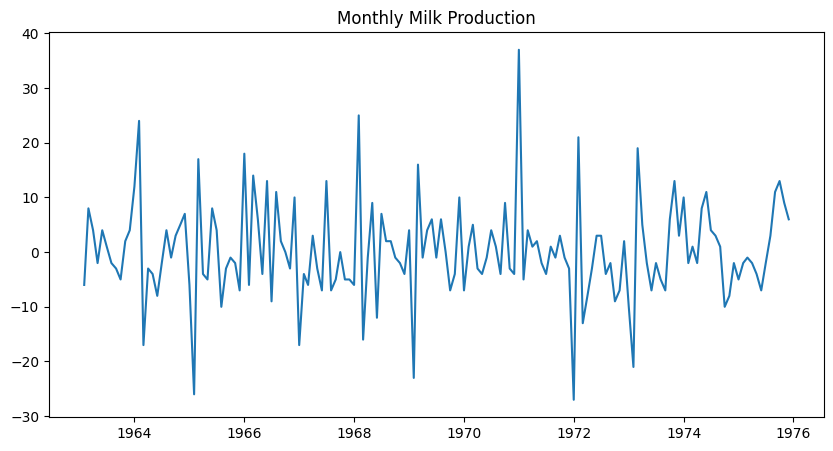

In [68]:
# Plotting the stationary time series data
plt.figure(figsize=(10,5))
plt.plot(df1)
plt.title("Monthly Milk Production")
plt.show()

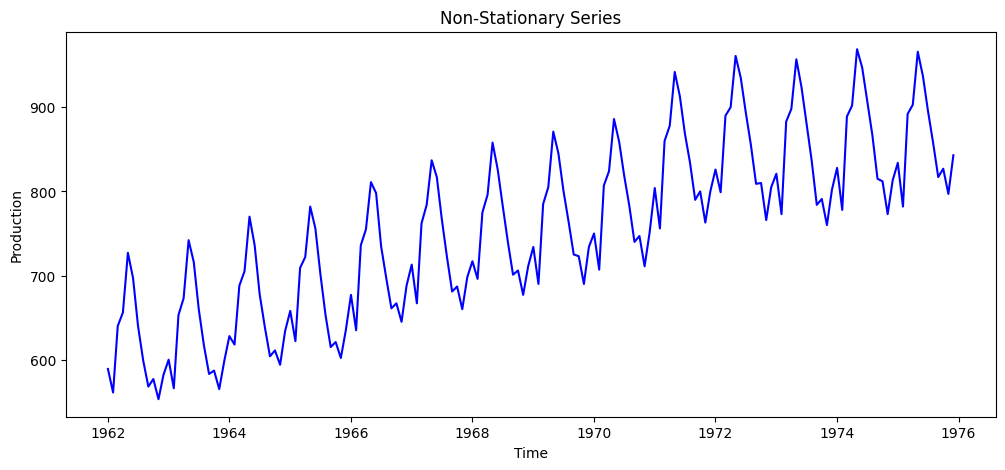

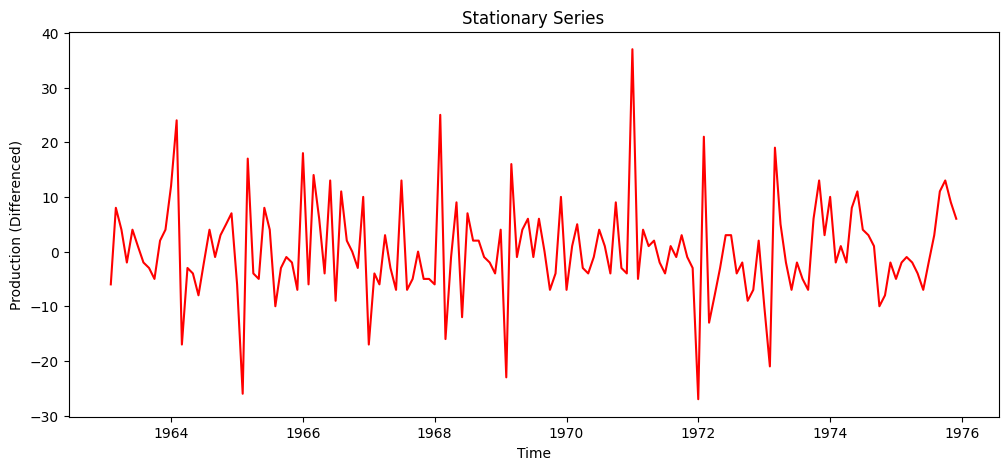

In [69]:

plt.figure(figsize=(12,5))
plt.plot(df, color='blue')
plt.title('Non-Stationary Series')
plt.xlabel('Time')
plt.ylabel('Production')
plt.show()

plt.figure(figsize=(12,5))
plt.plot(df1, color='red')
plt.title('Stationary Series')
plt.xlabel('Time')
plt.ylabel('Production (Differenced)')
plt.show()


While non stationary series shows the total amount of milk produced each month, the stationary series focuses only on how much production jumped or dropped compared to the previous period. By shifting the data to fluctuate around zero, we remove the distracting "big" trends and seasonal waves, allowing the model to focus purely on the hidden patterns and consistency of the changes.

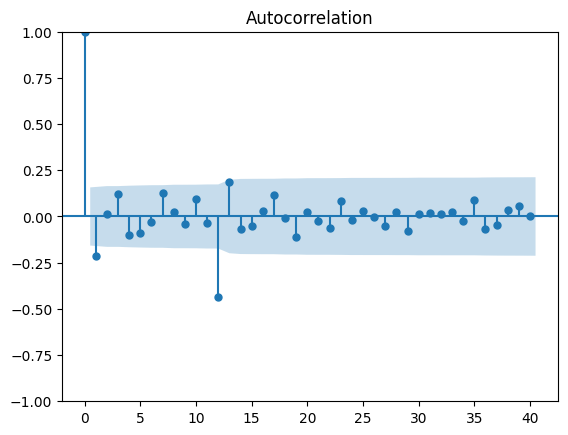

In [70]:
# Autocorrelation
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(df1['Production'], lags=40)
plt.show()


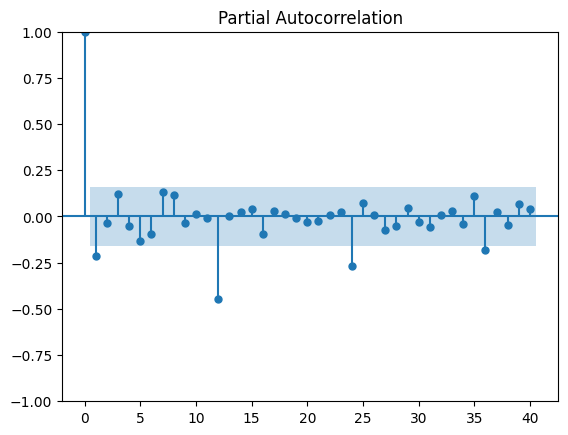

In [71]:
# Partial Autocorrelation

from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(df1['Production'], lags=40)
plt.show()

Based on the statistical analysis, the optimal model for the production data is a SARIMA(1, 1, 1)(1, 1, 1,12), which was determined by first achieving stationarity through both non-seasonal and seasonal differencing and then identifying significant spikes at Lag 1 and Lag 12 in the resulting ACF and PACF plots to set the autoregressive and moving average parameters.

# 4.Model Development

c:\Users\dell\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\dell\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\dell\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


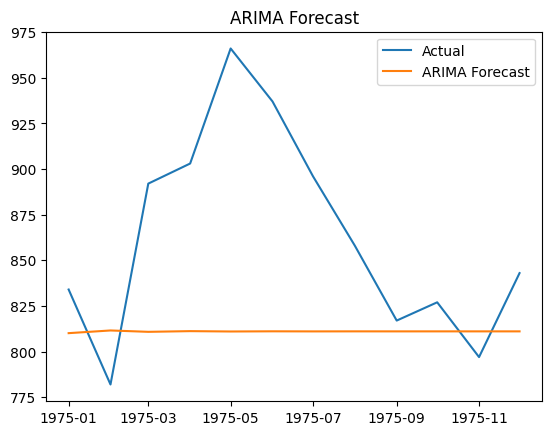

In [72]:
# splitting the data for training and testing purpose
from statsmodels.tsa.arima.model import ARIMA

# Train test split
train=df.iloc[:-12]
test=df.iloc[-12:]

# Fit ARIMA model
model_arima=ARIMA(train['Production'],order=(1,1,1)) # train["Production"] means give me production values only from training dataset.
                                        
model_arima_fit=model_arima.fit() # train the model

# Forecast next 12 months
forecast_arima=model_arima_fit.forecast(steps=12)

# Plot
plt.plot(test.index,test["Production"],label='Actual')
plt.plot(test.index,forecast_arima,label='ARIMA Forecast')
plt.legend()
plt.title("ARIMA Forecast")
plt.show()

The ARIMA model performs poorly because it does not account for seasonality present in the milk production data, resulting in an almost constant forecast.

c:\Users\dell\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\dell\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


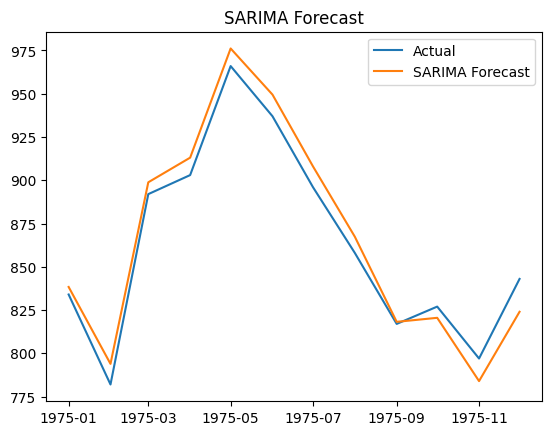

In [73]:
#  SARIMAX model
from statsmodels.tsa.statespace.sarimax import SARIMAX
model_sarima=SARIMAX(train["Production"],order=(1,1,1),seasonal_order=(1,1,1,12))
model_sarima_fit=model_sarima.fit()

# Forecast
forecast_sarima=model_sarima_fit.forecast(steps=12)

# Plot
plt.Figure(figsize=(20,10))
plt.plot(test.index,test["Production"],label='Actual')
plt.plot(test.index,forecast_sarima,label='SARIMA Forecast')
plt.legend()
plt.title("SARIMA Forecast")
plt.show()


The SARIMA model explicitly captures seasonal patterns using seasonal parameters, allowing it to closely follow the actual fluctuations in production. Therefore, SARIMA is more appropriate for time series data with strong seasonal behavior.

In [74]:
# Evaluation metrics

from sklearn.metrics import mean_absolute_error, mean_squared_error

# Actual test values
y_true = test['Production'].values # .values convert the pandas series to numpy array


# Evaluation function
def evaluate(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    print(f"{model_name} - MAE: {mae:.2f}, RMSE: {rmse:.2f}")

# Run evaluations
evaluate(y_true, forecast_arima.values, "ARIMA")
evaluate(y_true, forecast_sarima.values, "SARIMA")


ARIMA - MAE: 58.91, RMSE: 74.86
SARIMA - MAE: 9.74, RMSE: 10.70


The SARIMA model significantly outperforms the ARIMA model, achieving much lower MAE and RMSE values. This indicates that SARIMA produces more accurate and stable forecasts. The poor performance of ARIMA is due to its inability to capture the strong seasonal pattern present in the monthly production data. By explicitly modeling seasonality, SARIMA effectively captures recurring monthly fluctuations, making it the more appropriate model for this time series.

In [75]:
# Saving the model in pickle file.
import pickle

with open("sarima_model.pkl", "wb") as f:
    pickle.dump(model_sarima_fit, f)
        



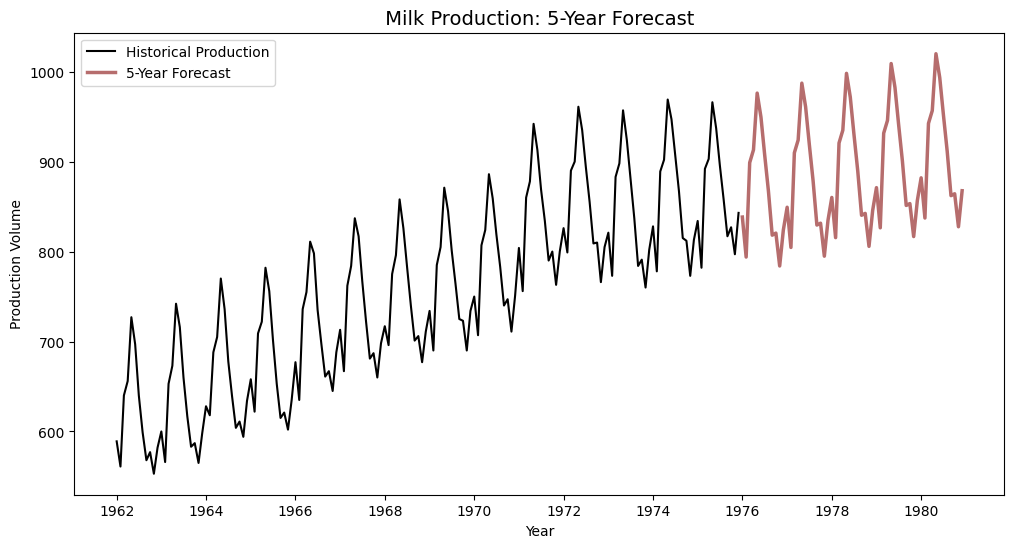

 Next 5 Years Forecast Table 
        Date  Forecasted_Production
0 1976-01-01             838.353396
1 1976-02-01             793.913277
2 1976-03-01             898.839314
3 1976-04-01             913.073226
4 1976-05-01             976.166137
5 1976-06-01             949.496445
6 1976-07-01             908.009369
7 1976-08-01             867.364223
8 1976-09-01             818.194595
9 1976-10-01             820.523006


In [76]:
# Forecasting for next 5 years.

#  Load  SARIMAX model
with open("sarima_model.pkl", "rb") as f:
    model_results = pickle.load(f)

# Forecast for next 5 years (60 months)
years = 5
forecast_steps = years * 12
forecast = model_results.forecast(steps=forecast_steps)

# Create future dates for plotting
last_date = df.index.max()
forecast_dates = pd.date_range(start=last_date, periods=forecast_steps + 1, freq='MS')[1:]

#  Plotting 
plt.figure(figsize=(12, 6))

# Plot Historical Data
plt.plot(df.index, df['Production'], color='black', label='Historical Production', linewidth=1.5)

# Plot Forecasted Trend 
plt.plot(forecast_dates, forecast, color="#80000092", label='5-Year Forecast', linewidth=2.5)


plt.title(' Milk Production: 5-Year Forecast ', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Production Volume')
plt.legend()
plt.show()

# 6. Display the forecast values for the 5-year plan.
forecast_df = pd.DataFrame({'Date': forecast_dates, 'Forecasted_Production': forecast.values})
print(" Next 5 Years Forecast Table ")
print(forecast_df.head(10)) # Shows first 10 months